In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize, poly)
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

In [50]:
auto = pd.read_csv("/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Stat 411 Book/All CSV Files/Auto.csv")

In [52]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [82]:
y = auto['mpg']
design = MS(['horsepower'])
X = design.fit_transform(auto)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


# Problem 8a part i.

# Yes there is a relationship between the predictor variable (horsepower) and the response variable (mpg).  We can tell that there is a relationship betwen the two variables because the p-value is lower than 0.05 and the t statistic is larger than 4 (adequately large) 

In [85]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        22:34:13   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

In [89]:
newdf = pd.DataFrame({'horsepower':[98]})
newX = design.transform(newdf)
prediction = results.get_prediction(newX)
prediction.predicted_mean

array([24.46707715])

In [91]:
prediction.conf_int(alpha = 0.05)

array([[23.97307896, 24.96107534]])

In [93]:
prediction.conf_int(obs = True, alpha = 0.05)

array([[14.80939607, 34.12475823]])

# Problem 8a part iv.

# Our predicted mpg associated with a horsepower of 98 would be 24.4715 mpg.  Our 95% confidence interval would be [23.973, 24.961] and our 95% prediction interval would be [14.809, 34.125] for a horsepower value of 98.

# Problem 8a extra part.

# Our estimate for the slope is -0.1578 which means we are saying that for every additional horsepower unit we are losing roughly 0.1578 mpg.

# Problem 8 part b

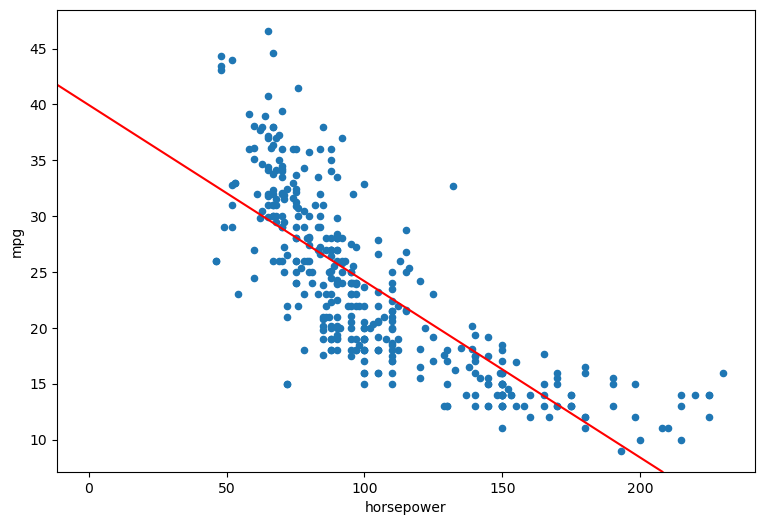

In [96]:
ax = auto.plot.scatter('horsepower', 'mpg', figsize = (9,6))
ax.axline(xy1 = (0, 39.9539), slope = -0.1578, color = "red")

In [98]:
autoHW = auto.copy()
autoHW.dropna()
autoHW['origin'] = autoHW['origin'].astype('category')
autoHW['cylinders'] = autoHW['cylinders'].astype('category') #This line is optional!
autoHW.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [100]:
autoHW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    category
 8   name          392 non-null    object  
dtypes: category(2), float64(4), int64(2), object(1)
memory usage: 25.6+ KB


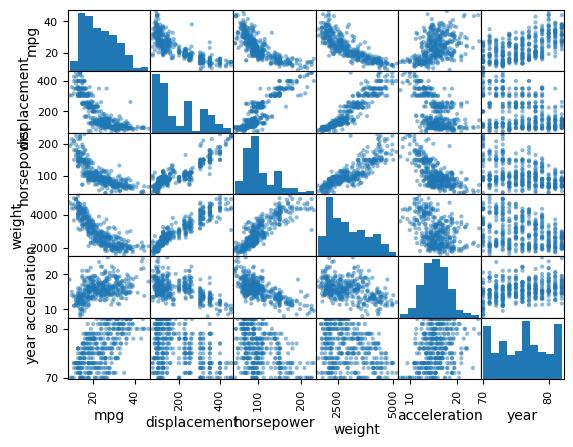

In [68]:
pd.plotting.scatter_matrix(autoHW);

# Problem 9a

# We can see what seems like a correlation between mpg with weight, horsepower, and displacement, all of these are similar in that the bigger the mpg the smaller the other variable.  We can see what seems like a very strong positive correlation between horsepower and displacement and also weight and horspepower.  These all make sense because as a car gets bigger or has more horsepower it will not be able to get as many mpg, also bigger, heavier cars tend to have more horsepower.

# Problem 9 part b

In [102]:
autoHW.corr(numeric_only = True)

,mpg,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,0.580541
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.369855,-0.416361,-0.309120,0.290316,1.000000


# This backs up what we were saying above with mpg being strongly negatively associated with displacement, horsepower, and weight.  We can also see that weight and horsepower have aa strong positive correlation and so do horsepower and displacement, which we could also see from the graphs above.

In [112]:
y = autoHW['mpg']
design = MS(['horsepower', 'weight', 'acceleration', 'year', 'origin'])
X = design.fit_transform(autoHW)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-18.0017,4.627,-3.891,0.000
horsepower,-0.0048,0.013,-0.360,0.719
weight,-0.0057,0.001,-11.252,0.000
acceleration,0.0392,0.098,0.401,0.689
year,0.7554,0.052,14.617,0.000
origin[2],1.9363,0.521,3.715,0.000
origin[3],2.2690,0.526,4.314,0.000


In [124]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     291.3
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          9.47e-140
Time:                        22:58:19   Log-Likelihood:                -1025.6
No. Observations:                 392   AIC:                             2065.
Df Residuals:                     385   BIC:                             2093.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -18.0017      4.627     -3.891      0.000     -27.099      -8.905
horsepower      -0.0048      0.013     -0.360      0.719      -0.031       0.021
weight          -0.0057      0.001    -11.252      0.000      -0.007      -0.005
acceleration     0.0392      0.098      0.401      0.689      -0.153       0.231
year             0.7554      0.052     14.617      0.000       0.654       0.857
origin[2]        1.9363      0.521      3.715      0.000       0.912       2.961
origin[3]        2.2690      0.526      4.314      0.000       1.235       3.303
==============================================================================
Omnibus:                       30.859   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.113
Skew:                           0.509   Prob(JB):                     4.83e-12
Kurtosis:                       4.468   Cond. No.                     8.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Problem 9 part c part i.

# Yes there is a relationship between the predictors and the mpg because our test statistic is 291.3 and our p-value is basically 0, so we can say that our model is signifigant.

# Problem 9 part c part ii.

# The predcitors weight, year, and the origin variables.  They are the most signifigant because they have the lowest p-values of the predictors.

# Problem 9 part c extra part

# There are two origin variables because we converted it from a category variable to a numeric variable with three possible values for the three different origin categories.  There is only need for two because if it isn't from the first two it has to be from the last option.

In [145]:
autoHW['weight_year'] = autoHW['weight'] * autoHW['year']
X = MS(['horsepower', 'weight', 'acceleration', 'year', 'origin', 'weight_year']).fit_transform(autoHW)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-123.6819,13.20000,-9.370,0.000
horsepower,-0.0196,0.01200,-1.597,0.111
weight,0.0329,0.00500,7.179,0.000
acceleration,0.1002,0.09000,1.112,0.267
year,2.1543,0.17200,12.518,0.000
origin[2],2.0456,0.47900,4.268,0.000
origin[3],1.8121,0.48700,3.724,0.000
weight_year,-0.0005,0.00006,-8.457,0.000


# Problem 9 part e

# I fit the model with an interaction term between year and weight which is signifigant for the model because the p-value is 0.  I wouldve done it for other variables but I couldnt figure out how to do it for origin and the other variables werent that signifigant for the model.

In [148]:
X = MS([poly('horsepower', degree = 2, raw = True)]).fit_transform(autoHW)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,56.9001,1.800,31.604,0.0
"poly(horsepower, degree=2, raw=True)[0]",-0.4662,0.031,-14.978,0.0
"poly(horsepower, degree=2, raw=True)[1]",0.0012,0.000,10.080,0.0


In [150]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.40e-99
Time:                        23:22:30   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
intercept                                  56.9001      1.800     31.604      0.000      53.360      60.440
poly(horsepower, degree=2, raw=True)[0]    -0.4662      0.031    -14.978      0.000      -0.527      -0.405
poly(horsepower, degree=2, raw=True)[1]     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Problem 9 part f

# With a quadratic term the model is signifigant because the p-value is 0, we also have a larger R squared value for this model which means it explains more of the variance in mpg.

In [153]:
carseats = pd.read_csv("/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Stat 411 Book/All CSV Files/Carseats.csv")
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Problem 10 part a

In [165]:
carseats['Urban'] = carseats['Urban'].astype('category')
carseats['US'] = carseats['US'].astype('category')

In [155]:
y = carseats['Sales']
design = MS(['Price'])
X = design.fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.6419,0.633,21.558,0.0
Price,-0.0531,0.005,-9.912,0.0


In [167]:
y = carseats['Sales']
design = MS(['Urban'])
X = design.fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,7.5636,0.26,29.060,0.000
Urban[Yes],-0.0954,0.31,-0.308,0.759


In [169]:
y = carseats['Sales']
design = MS(['US'])
X = design.fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,6.8230,0.234,29.215,0.0
US[Yes],1.0439,0.291,3.590,0.0


# Problem 10 part b

# Price had a coefficient of -0.0531 and a p-value of 0 suggesting that it was signifigant and that as price went up a dollar sales would go down 0.0531 units on average

# Urban had a coefficient of -0.0954 and a p-value of 0.759 suggesting that it isnt signifigant and that if it is an urban area sales go down 0.0954 units

# US had a coefficient of 1.0439 and a p-value of 0 suggesting that is is signifigant and that if it is in the US sales go up by 1.0439 units.

In [173]:
y = carseats['Sales']
design = MS(['Price', 'Urban', 'US'])
X = design.fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [175]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.39e-23
Time:                        23:48:23   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Problem 10 part c

# Sales = 13.0435 - 0.0545Price - 0.0219Urban + 1.2006US

# Problem 10 part d

# For our predictors US and Price we can reject our null hypothesis because our p-values are 0.  We cant do the same for Urban as it has a p-value greater than 0.05.

# Problem 10 part e

In [179]:
y = carseats['Sales']
design = MS(['Price', 'US'])
X = design.fit_transform(carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [181]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.66e-24
Time:                        23:51:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Problem 10 part f

# Both models from a and e fit the data well however our model from part e was better as it had a lower p-value than part a and it also had a slightly larger test statistic.  They do however have the smae r squared value which suggests that our model from part e might not fit the data that well.